## Import the relevant lib 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf

## Data generation

In [2]:
observations = 1000
# np.random.uniform(low, high, size) draws a random value from the interval (low,high), where each number has an equal chance to be selected
x = np.random.uniform(-10,10, (observations,1))
z = np.random.uniform(-10,10, (observations,1))

generated_inputs = np.column_stack((x,z)) # np.column_stack() takes a sequence of 1D arrays and stacks them into a single 2D array
noise = np.random.uniform(-1,1, (observations,1))

generated_targets = 2*x - 3*z + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


## Solving  with TF

In [3]:
training_data = np.load('TF_intro.npz')

In [10]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs= 100, verbose= 1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13.6761
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3452
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3580
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3557
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3499
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3473
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3462
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3507
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3490
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3534
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3543
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3503
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3499
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3512
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3520 
Ep

## Extracting the weights and bias

In [11]:
model.layers[0].get_weights()

[array([[ 1.9176109],
        [-3.0268722]], dtype=float32),
 array([-0.00824346], dtype=float32)]

In [8]:
weights = model.layers[0].get_weights()
weights

[array([[ 1.972816 ],
        [-2.9832935]], dtype=float32),
 array([-0.01781376], dtype=float32)]

In [9]:
bias = model.layers[0].get_weights()[1]
bias

array([-0.01781376], dtype=float32)

## Extract the outputs (make predictions)

In [13]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 15.7],
       [ 27.5],
       [ -7.9],
       [ 36.8],
       [-46. ],
       [-18.8],
       [ 17.7],
       [ 20.7],
       [ -2.1],
       [ -3.4],
       [-24.4],
       [-24.9],
       [ 16.9],
       [ 24.3],
       [-22.8],
       [  0.9],
       [ 26. ],
       [-13.3],
       [ 24.4],
       [-11.9],
       [  7.5],
       [-36.5],
       [-27.9],
       [ -0.9],
       [-17.6],
       [  2.7],
       [-16.2],
       [-12.8],
       [-38.8],
       [-25.9],
       [-11.7],
       [-26.8],
       [ 14.1],
       [ 30.5],
       [ 17.4],
       [ -9.8],
       [  0.7],
       [ 36.7],
       [  7.7],
       [ 21.4],
       [  8. ],
       [ -0.6],
       [-36.3],
       [ -3.6],
       [-23.4],
       [-22.6],
       [ 35.8],
       [-13.1],
       [ 36. ],
       [  5.6],
       [  8.9],
       [-29.8],
       [-13.2],
       [  0.2],
       [ 13.7],
       [  1.9],
       [-10.9],
       [ 13.3],
       [ 27.3],
       [ 18.6],
       [-15.2],
       [-26.2],
       [

In [14]:
training_data['targets'].round(1)

array([[ 16.2],
       [ 28.5],
       [ -8.2],
       [ 36.6],
       [-47.1],
       [-18.8],
       [ 16.2],
       [ 20.1],
       [ -2.7],
       [ -3.8],
       [-24.3],
       [-25.1],
       [ 16.9],
       [ 24.3],
       [-22.7],
       [  0.9],
       [ 26.7],
       [-13.5],
       [ 24.5],
       [-12.2],
       [  9.3],
       [-36.9],
       [-28.1],
       [ -0.3],
       [-17.2],
       [  2.3],
       [-14.8],
       [-13.4],
       [-39.6],
       [-26.5],
       [-12.8],
       [-27.6],
       [ 14.5],
       [ 30.9],
       [ 16.6],
       [ -9.7],
       [ -0.4],
       [ 36.5],
       [  8.5],
       [ 22. ],
       [  8.8],
       [  0.1],
       [-36.7],
       [ -3.5],
       [-23.4],
       [-23.3],
       [ 35.4],
       [-12.5],
       [ 35.6],
       [  6.4],
       [  9.7],
       [-30.5],
       [-13.1],
       [ -1. ],
       [ 14.1],
       [  1. ],
       [-11.1],
       [ 13.3],
       [ 26.2],
       [ 18.3],
       [-15.5],
       [-27.7],
       [

## Plotting the data

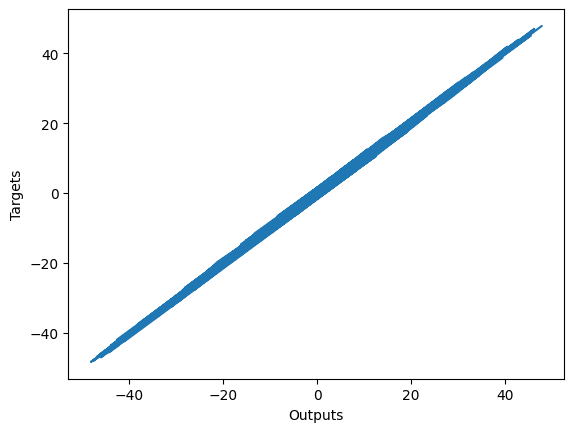

In [15]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()
